In [1]:
import os
import sys

# Move up to the correct project root
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

print("Updated Python path:", sys.path)  # Debugging check


Updated Python path: ['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\\python312.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.12_3.12.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env', '', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages\\win32', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\Documents\\A Studientarbeit\\Kaka\\Studienarbeit\\trading_env\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ntekaatl\\OneDrive - Cisco\\D

In [14]:
!jupyter nbconvert --to script "DQN_Backtest.ipynb"

[NbConvertApp] Converting notebook DQN_Backtest.ipynb to script
[NbConvertApp] Writing 6866 bytes to DQN_Backtest.py


In [ ]:
from stable_baselines3 import DQN
import torch
import random
from Environment.environment import TradingEnv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

def run_dqn_backtest():
    # === Vorbereitung ===
    SEED = 42

    # Python
    random.seed(SEED)
    # Numpy
    np.random.seed(SEED)
    # Torch
    torch.manual_seed(SEED)
    torch.use_deterministic_algorithms(True)
    # Optional: CUDA (falls GPU verwendet wird)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

    # === Testdaten laden ===
    BASE_DIR = os.getcwd()
    test_data_path = os.path.join(BASE_DIR, '..', '..', 'Transform_data', 'stand_data', '2025-2024_stand_data.csv')
    scaler_path = os.path.join(BASE_DIR, '..', '..', 'Transform_data', 'scaler.pkl')


    test_data = pd.read_csv(test_data_path)
    test_data.drop('datetime', axis=1, inplace=True)

    # === Environment erstellen ===
    test_env = TradingEnv(
        data=test_data,
        initial_cash=10_000,
        window_size=336,
        scaler_path=scaler_path,
        default_seed=SEED
    )

    # === Modell laden ===
    model_path = os.path.join(BASE_DIR, '../../Agents/DQN/dqn_trading_model_')
    model = DQN.load(model_path)

    # === Episode ausführen ===
    reset_result = test_env.reset(seed=SEED)
    if isinstance(reset_result, tuple):
        obs, info = reset_result
    else:
        obs = reset_result
    done = False

    action_list = []

    while not done:
        action, _states = model.predict(obs, deterministic=True)
        action = int(action)  # Wichtig!
        step_result = test_env.step(action)
        if len(step_result) == 5:
            obs, reward, done, truncated, info = step_result
        else:
            obs, reward, done, info = step_result
        action_list.append(action)

    # === Ergebnisse anzeigen ===
    test_env.render(mode='human')
    print("Aktionen des Agenten:", action_list)
    
    from collections import Counter
    action_counts = Counter(action_list)
    actions = list(range(9))
    counts = [action_counts.get(action, 0) for action in actions]

    plt.figure(figsize=(8, 5))
    plt.bar(actions, counts, tick_label=actions)
    plt.xlabel("Action")
    plt.ylabel("Frequency")
    plt.title("Agent Action Distribution")
    plt.grid(axis='y')
    plt.show()

    # Erzeuge Zeitindex, passend zur Länge des Portfolios
    index = test_env.data.index[-len(test_env.portfolio_value_history):]

    portfolio_series = pd.Series(test_env.portfolio_value_history, index=index)

    return {
        "portfolio": portfolio_series,
        "actions": action_list
    }




Seed in the environment: 42
Seed in the environment: 42


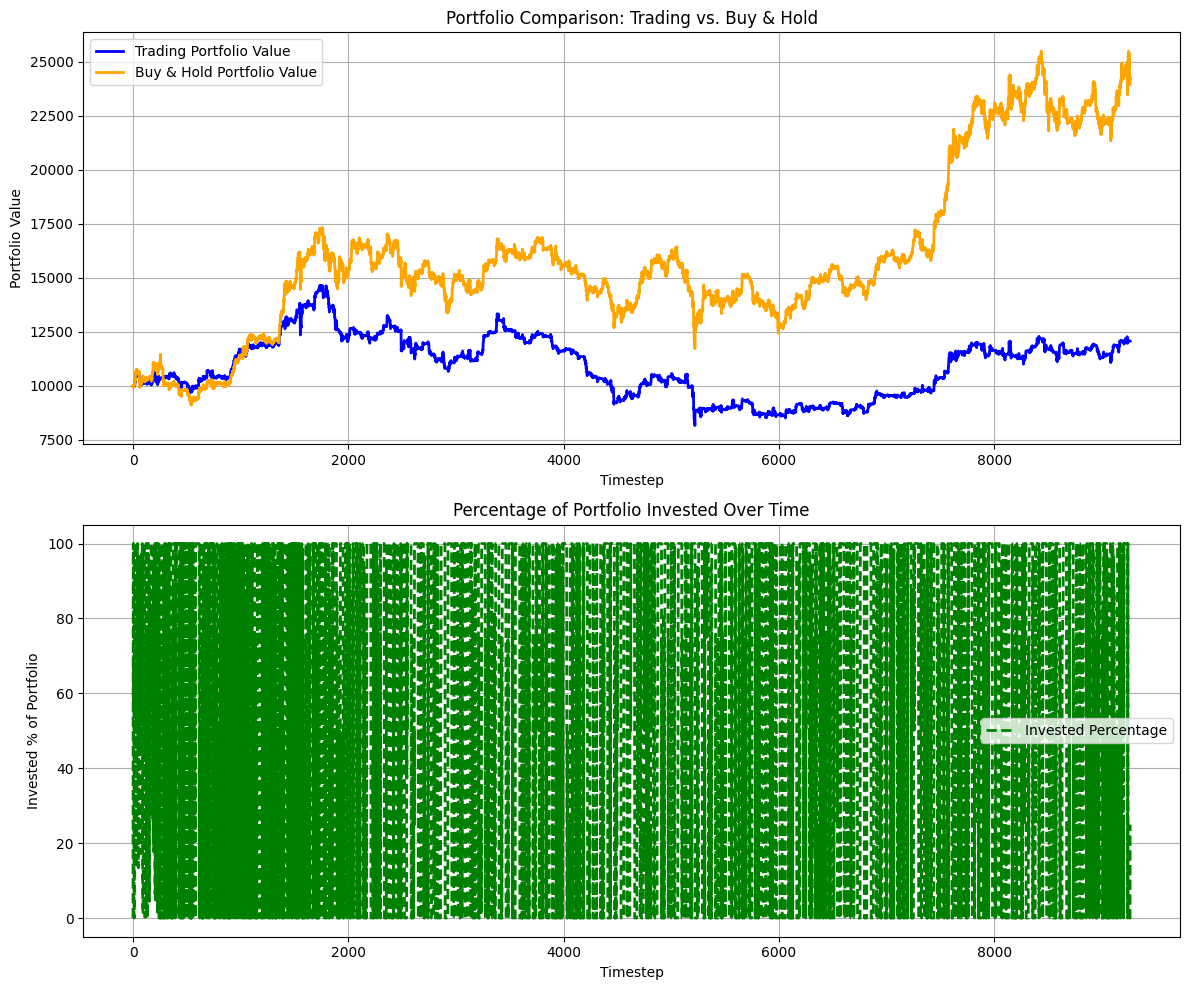

Aktionen des Agenten: [4, 0, 0, 1, 5, 5, 1, 5, 8, 8, 0, 8, 2, 2, 2, 0, 3, 0, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 2, 1, 5, 3, 1, 5, 1, 3, 4, 3, 3, 5, 5, 5, 5, 5, 5, 5, 1, 1, 2, 2, 1, 5, 5, 1, 1, 1, 5, 5, 3, 3, 0, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 3, 5, 5, 3, 3, 5, 5, 4, 5, 5, 7, 7, 5, 5, 5, 5, 1, 1, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 7, 7, 7, 7, 5, 5, 5, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 7, 7, 7, 7, 7, 3, 8, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 3, 3, 7, 5, 7, 3, 2, 5, 5, 5, 1, 1, 5, 5, 5, 0, 3, 5, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2, 4, 1, 5, 5, 2, 3, 3, 3, 3, 7, 3, 7, 3, 3, 7, 5, 3, 5, 3, 3, 5, 7, 3, 3, 3, 3, 3, 7, 7, 3, 7, 7, 4, 7, 7, 3, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 7, 4, 7, 7, 7, 3, 7, 7, 3, 3, 3, 3, 3, 3, 3, 5, 1, 1, 1, 1, 8, 4, 3, 3, 4, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 0, 4, 3, 3, 3, 3, 3, 8, 8, 8, 0, 8, 8, 8, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 4, 0, 3, 7, 8, 8, 8, 8, 8, 3, 0, 3, 3, 3, 2, 2, 2, 8, 0, 8, 8, 3, 8, 8, 2, 2, 2, 8, 2, 2, 8, 8, 7,

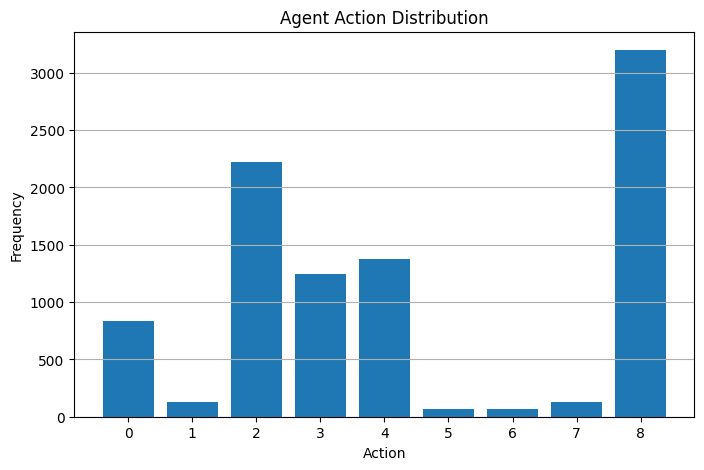

RangeIndex(start=0, stop=5, step=1)


In [17]:
dqn_result = run_dqn_backtest()
print(dqn_result["portfolio"].index[:5])


In [ ]:
import numpy as np

def compute_sharpe_ratio(portfolio_values, risk_free_rate=0.0, periods_per_year=8760):
    """
    Compute the Sharpe Ratio using the portfolio returns.
    
    Parameters:
    - portfolio_values: List or array of portfolio values over time.
    - risk_free_rate: Annual risk-free rate (default: 0).
    - periods_per_year: Number of periods in one year (default: 8760 for hourly data).
    
    Returns:
    - Sharpe ratio (annualized).
    """
    portfolio_values = np.array(portfolio_values)
    # Calculate period-to-period returns
    returns = np.diff(portfolio_values) / portfolio_values[:-1]
    # Calculate excess returns over the period risk-free rate
    excess_returns = returns - risk_free_rate / periods_per_year
    # Annualize the Sharpe Ratio
    sharpe_ratio = np.mean(excess_returns) / np.std(excess_returns) * np.sqrt(periods_per_year)
    return sharpe_ratio

def compute_max_drawdown(portfolio_values):
    """
    Compute the Maximum Drawdown from the portfolio value history.
    
    Parameters:
    - portfolio_values: List or array of portfolio values over time.
    
    Returns:
    - Maximum drawdown as a negative number (e.g., -0.2 means a 20% drawdown).
    """
    portfolio_values = np.array(portfolio_values)
    cumulative_max = np.maximum.accumulate(portfolio_values)
    drawdowns = (portfolio_values - cumulative_max) / cumulative_max
    max_drawdown = np.min(drawdowns)
    return max_drawdown

def compute_annualized_return(portfolio_values, periods_per_year=8760):
    """
    Compute the annualized return (CAGR) based on the portfolio value history.
    
    Parameters:
    - portfolio_values: List or array of portfolio values over time.
    - periods_per_year: Number of periods in one year.
    
    Returns:
    - Annualized return as a decimal (e.g., 0.12 for 12% per year).
    """
    portfolio_values = np.array(portfolio_values)
    total_periods = len(portfolio_values)
    total_return = portfolio_values[-1] / portfolio_values[0]
    annualized_return = total_return**(periods_per_year / total_periods) - 1
    return annualized_return

def compute_win_loss_rate(portfolio_values):
    """
    Compute the win-loss rate based on the period-to-period returns.
    
    Parameters:
    - portfolio_values: List or array of portfolio values over time.
    
    Returns:
    - A tuple (win_rate, loss_rate) where each value is between 0 and 1.
    """
    portfolio_values = np.array(portfolio_values)
    returns = np.diff(portfolio_values) / portfolio_values[:-1]
    wins = np.sum(returns > 0)
    losses = np.sum(returns <= 0)
    win_rate = wins / (wins + losses) if (wins + losses) > 0 else 0
    loss_rate = 1 - win_rate
    return win_rate, loss_rate

def compute_backtest_metrics(portfolio_values, risk_free_rate=0.0, periods_per_year=8760):
    portfolio = pd.Series(portfolio_values)
    returns = portfolio.pct_change().dropna()

    final_portfolio_value = portfolio.iloc[-1]
    profit = final_portfolio_value - portfolio.iloc[0]

    annualized_return = (final_portfolio_value / portfolio.iloc[0]) ** (periods_per_year / len(portfolio)) - 1
    sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(periods_per_year) if returns.std() != 0 else np.nan
    max_drawdown = (portfolio / portfolio.cummax() - 1).min()

    win_rate = (returns > 0).mean()
    loss_rate = (returns < 0).mean()

    return {
        "final_portfolio_value": final_portfolio_value,
        "profit": profit,
        "annualized_return": annualized_return,
        "sharpe_ratio": sharpe_ratio,
        "max_drawdown": max_drawdown,
        "win_rate": win_rate,
        "loss_rate": loss_rate
    }

result = run_dqn_backtest()
portfolio = result["portfolio"]
metrics = compute_backtest_metrics(portfolio)

# Anzeigen
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")



Backtesting Metrics:
final_portfolio_value: 12079.7689
profit: 2079.7689
annualized_return: 0.1956
sharpe_ratio: 0.6545
max_drawdown: -0.4423
win_rate: 0.3195
loss_rate: 0.3087
